### Libraries and dataset import

In [1]:
#libraries import
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import json #for dict to string conversion

#setting options
sns.set_theme()
pd.set_option('display.max_columns', 48)
#print all messages
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Load dataset and check column list

In [2]:
#%% Load dataset
df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')
print(df.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


### Check of basic information

In [3]:
print("HEAD:")
df.head()
print("\nDESCRIBE:")
df.describe()
print("\nINFO:")
df.info()

HEAD:


Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes


DESCRIBE:


Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000


INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null 

Data is clean: there is no Nan and all values seem to be in a reasonable range.  
First let's change 'Date' into datetime.

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
#reduction of count column name
df.rename(columns={'Rented Bike Count':'Count'}, inplace=True)
df['Seasons'] = pd.Categorical(df['Seasons'], categories=['Winter', 'Spring', 
             'Summer', 'Autumn'], ordered=True)
df['Holiday'] = pd.Categorical(df['Holiday'], categories=['No Holiday', 'Holiday'])
df['Functioning Day'] = pd.Categorical(df['Functioning Day'], categories=['No', 'Yes'])

/home/ing3lo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(736664.0, 737028.0)

(0.0, 37500.0)

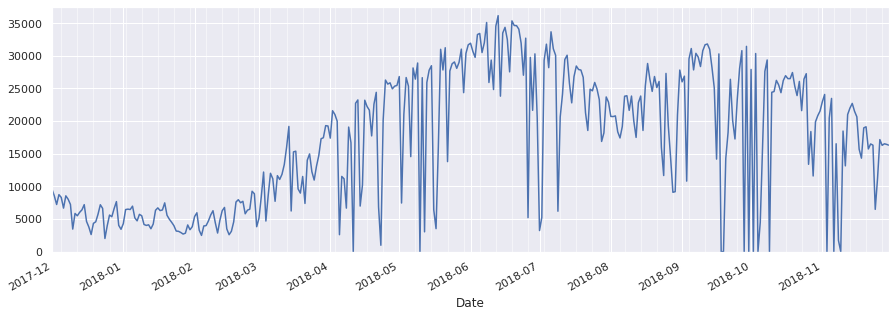

In [5]:
import matplotlib.dates as md
#in first examples we play with groupby
by_day = df.groupby(['Date'])['Count'].sum()
fig, ax1 = plt.subplots(1,1, figsize=(15,5))
sns.lineplot(by_day.index, by_day.values, ax=ax1)
fig.autofmt_xdate()
ax1.xaxis.set_major_locator(md.MonthLocator(bymonthday = 1))
ax1.set_xlim(md.datestr2num(("2017/12/01", "2018/11/30")))
ax1.set_ylim((0, 37500))
ax1.xaxis.set_minor_locator(md.WeekdayLocator(byweekday = 1))
ax1.grid(b=True, which='minor', color='white', lw=0.5)

There is increase of count with time that seems to not only be season dependent.
Let's extract data from date.

In [6]:
df['Weekday'] = pd.Categorical(df['Date'].dt.day_name(), categories=['Monday', 'Tuesday', 
             'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df['Weekend'] = (df['Weekday'].cat.codes >= 5).astype(int)
df['Month'] = pd.Categorical(df['Date'].dt.month_name(), categories=['January', 'February', 
             'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
             'November', 'December'], ordered=True)

Let's investigate count statistics per different datetime units.

(0.0, 23.0)

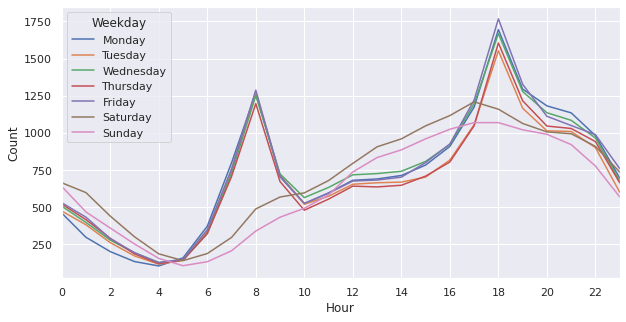

In [7]:
import matplotlib.ticker as ticker
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
sns.lineplot(x='Hour', y='Count', data=df, hue='Weekday', ci=None)
ax1.set_xlim((0,23))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))

(0.0, 23.0)

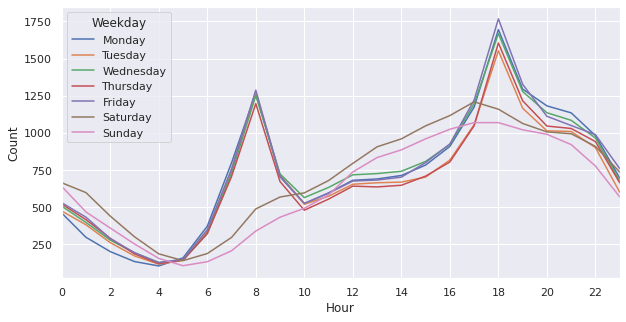

In [8]:
import matplotlib.ticker as ticker
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
sns.lineplot(x='Hour', y='Count', data=df, hue='Weekday', ci=None)
ax1.set_xlim((0,23))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))

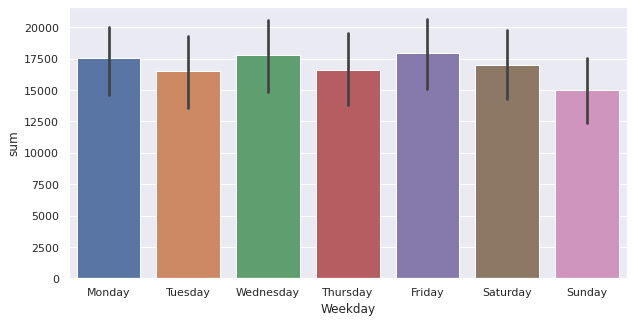

In [9]:
#Day average per weekday
by_weekday = df.groupby(['Date'])['Count'].agg(['sum'])
by_weekday = by_weekday.reset_index()
by_weekday['Weekday'] = pd.Categorical(by_weekday['Date'].dt.day_name(), categories=['Monday', 'Tuesday', 
             'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x='Weekday', y='sum', data=by_weekday, ax=ax1)

Text(0, 0.5, 'Day average')

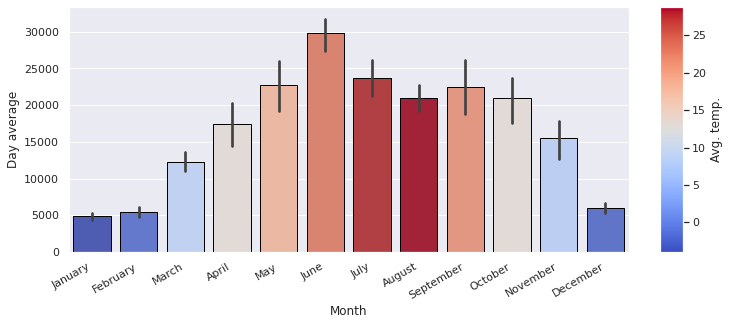

In [10]:
#Day average per month
by_month = df.groupby(['Date'])['Count'].agg(['sum'])
by_month = by_month.reset_index()
by_month['Month'] = pd.Categorical(by_month['Date'].dt.month_name(), categories=['January', 'February', 
             'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
             'November', 'December'], ordered=True)
#set colors of bars accordingly to mean temperature
temp_month = df.groupby(['Month'])['Temperature(°C)'].agg(['mean'])
temp_month_a = 100*(temp_month - temp_month.min())/(temp_month.max() - temp_month.min())
col_pal = sns.color_palette("coolwarm", 101)
colors = []
for x in temp_month_a.round().values.astype(int).T[0]:
    colors.append(col_pal[x])
#plot bars
fig = plt.figure(figsize=(11, 5), facecolor='w', edgecolor='k')
gs = fig.add_gridspec(1, 23)
#Residual vs. fitted
ax1 = fig.add_subplot(gs[0, :21])
ax2 = fig.add_subplot(gs[0, 22])
sns.barplot(x='Month', y='sum', data=by_month, ax=ax1, palette=colors, edgecolor=(0,0,0))
ax1.set_ylabel("Day average")
cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=temp_month.min(), vmax=temp_month.max())
cb1 = mpl.colorbar.ColorbarBase(ax=ax2, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Avg. temp.')
fig.autofmt_xdate()

It seem that usage of bikes is highly related with temperature but July/Augustus are vacation weeks so the usage drops in that time.

Text(0.5, 0, 'Usage per day')

Text(0, 0.5, 'Avg. temp.')

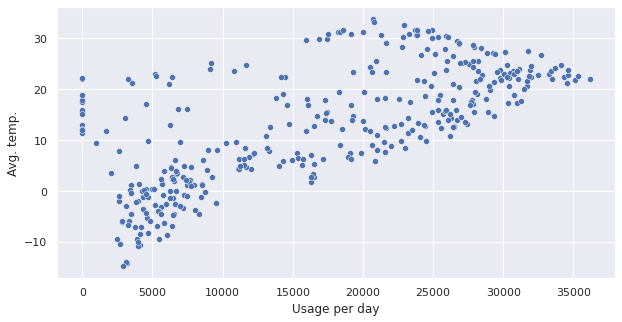

In [11]:
count_day = df.groupby(['Date'])['Count'].agg(['sum'])
temp_day = df.groupby(['Date'])['Temperature(°C)'].agg(['mean']) 
db = pd.concat([count_day, temp_day], axis=1).reset_index()
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
sns.scatterplot(x='sum', y='mean', data=db, ax=ax1)
ax1.set_xlabel("Usage per day")
ax1.set_ylabel("Avg. temp.")

Bikse usage increases with the increase of temeprature.

Text(0.5, 0, 'Usage per day')

Text(0, 0.5, 'Avg. humidity')

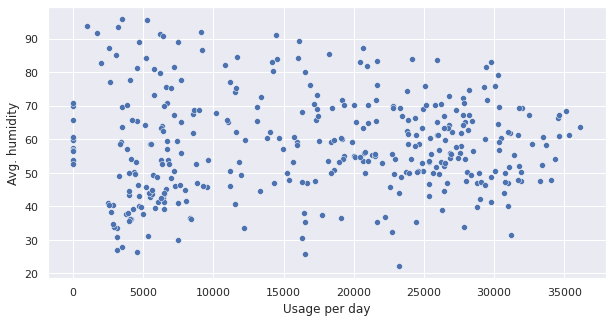

In [12]:
count_day = df.groupby(['Date'])['Count'].agg(['sum'])
temp_day = df.groupby(['Date'])['Humidity(%)'].agg(['mean']) 
db = pd.concat([count_day, temp_day], axis=1).reset_index()
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
sns.scatterplot(x='sum', y='mean', data=db, ax=ax1)
ax1.set_xlabel("Usage per day")
ax1.set_ylabel("Avg. humidity")

Humidity has no effect on bikes usage.

Text(0.5, 0, 'Usage per day')

Text(0, 0.5, 'Avg. rainfall')

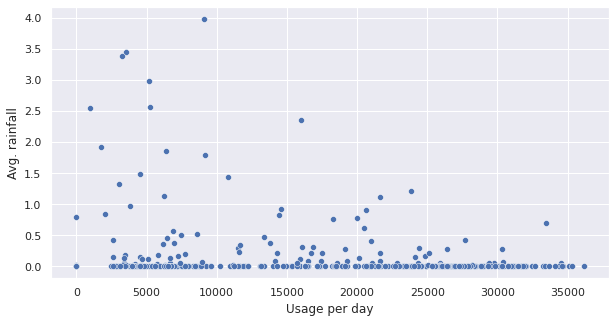

In [13]:
count_day = df.groupby(['Date'])['Count'].agg(['sum'])
temp_day = df.groupby(['Date'])['Rainfall(mm)'].agg(['mean']) 
db = pd.concat([count_day, temp_day], axis=1).reset_index()
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
sns.scatterplot(x='sum', y='mean', data=db, ax=ax1)
ax1.set_xlabel("Usage per day")
ax1.set_ylabel("Avg. rainfall")

There seem to be a trend of decrease of bikes usage with the increase of avg. rainfall.

Text(0.5, 0, 'Usage per day')

Text(0, 0.5, 'Avg. snowfall')

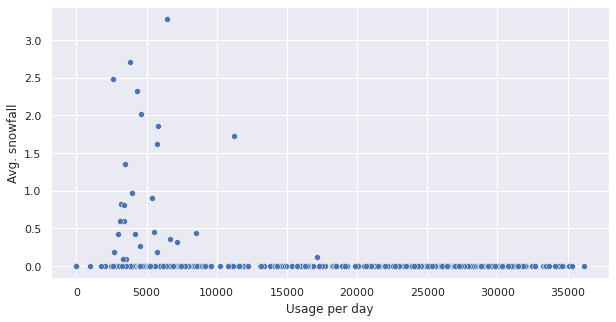

In [14]:
count_day = df.groupby(['Date'])['Count'].agg(['sum'])
temp_day = df.groupby(['Date'])['Snowfall (cm)'].agg(['mean']) 
db = pd.concat([count_day, temp_day], axis=1).reset_index()
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
sns.scatterplot(x='sum', y='mean', data=db, ax=ax1)
ax1.set_xlabel("Usage per day")
ax1.set_ylabel("Avg. snowfall")

Snowfall has negative effect on bikes usage.

Text(0.5, 0, 'Usage per day')

Text(0, 0.5, 'Avg. windspeed')

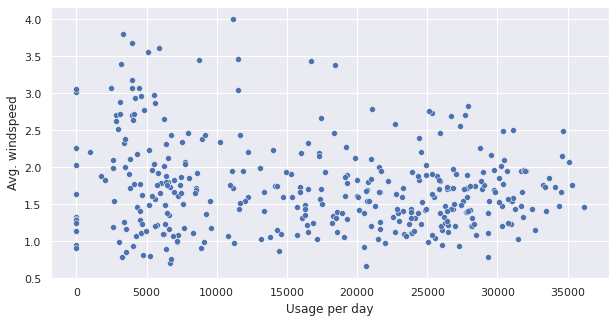

In [15]:
count_day = df.groupby(['Date'])['Count'].agg(['sum'])
temp_day = df.groupby(['Date'])['Wind speed (m/s)'].agg(['mean']) 
db = pd.concat([count_day, temp_day], axis=1).reset_index()
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
sns.scatterplot(x='sum', y='mean', data=db, ax=ax1)
ax1.set_xlabel("Usage per day")
ax1.set_ylabel("Avg. windspeed")

Windspeed has little to no effect on bikes usage.

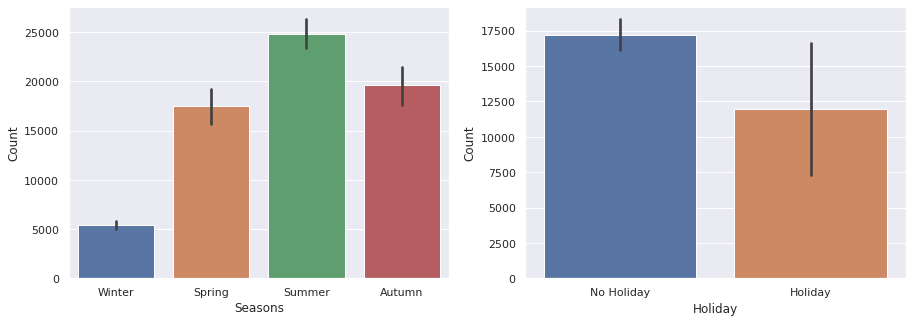

In [16]:
#Two more averages of day sum: season and holiday.
#this time lets try resample instead of group aggregations.
#First make a separate timeseries with hours
df_p = pd.DataFrame({'Date': df['Date'] + df['Hour'].astype('timedelta64[h]'),
              'Seasons': df['Seasons'], 'Holiday': df['Holiday'], 'Count': df['Count']})
df_p.set_index('Date', inplace = True)
#now resample per day with separate function for different categories
df_p = df_p.resample('1D').agg({'Seasons': 'first', 'Holiday': 'first', 'Count': 'sum'})
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x='Seasons', y='Count', data=df_p, ax=axs[0])
sns.barplot(x='Holiday', y='Count', data=df_p, ax=axs[1])

Bikes usage is bigger in summer and when there is no holidays(people are working and going to schools)

Time for individual histograms, pairplot and heatmap.

Univariate data distribution

/home/ing3lo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ing3lo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ing3lo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

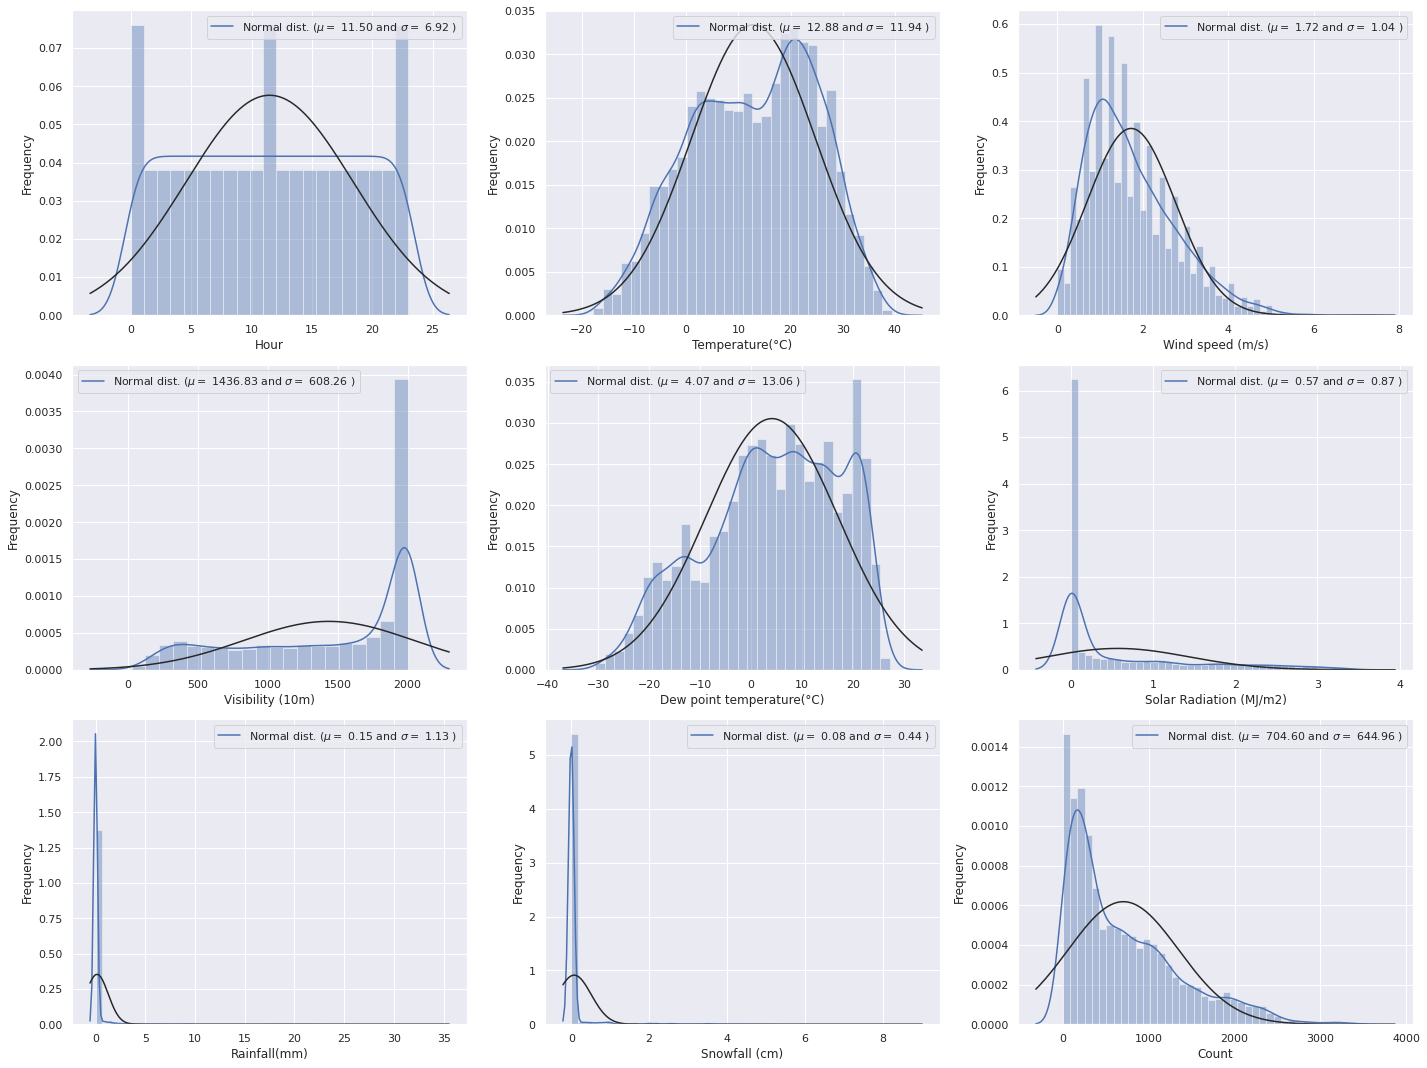

In [17]:
#Univariate data distribution
from scipy.stats import norm, skew, boxcox #for some statistics
def PlotDist(df):
    fig, axs = plt.subplots(3, 3, figsize=(20,15))
    x1, y1 = 0, 0
    for cl in df.columns:
        #print(cl, x1, y1)
        sns.distplot(df[cl], fit=norm, ax=axs[y1][x1])
        (mu, sigma) = norm.fit(df[cl])
        #Now plot the distribution
        axs[y1][x1].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                    loc='best')
        axs[y1][x1].set_ylabel('Frequency')
        x1 += 1
        if x1 == 3: x1 = 0; y1 +=1
    fig.tight_layout()
    
df_p = df[['Hour', 'Temperature(°C)', 
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Count']]

PlotDist(df_p)
#holiday and functionin plots as count plot

Distribution similar to normal could be obtained from temperature, wind speed, dew point temperature.  
Count has non-normal distribution.

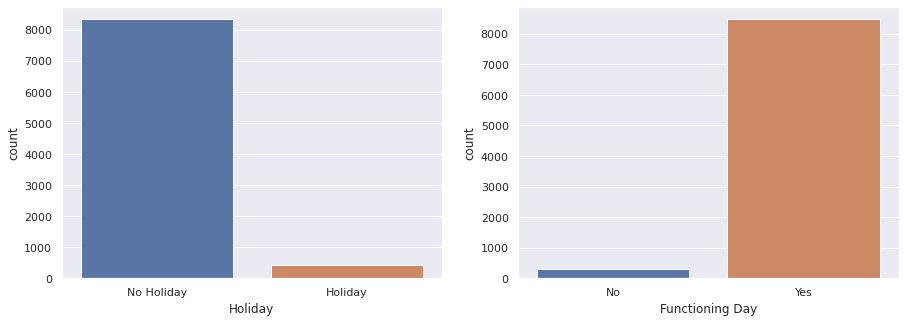

In [18]:
#count plot for holiday and functioning day 'Holiday', 'Functioning Day'
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='Holiday', data=df, ax=axs[0])
sns.countplot(x='Functioning Day', data=df, ax=axs[1])

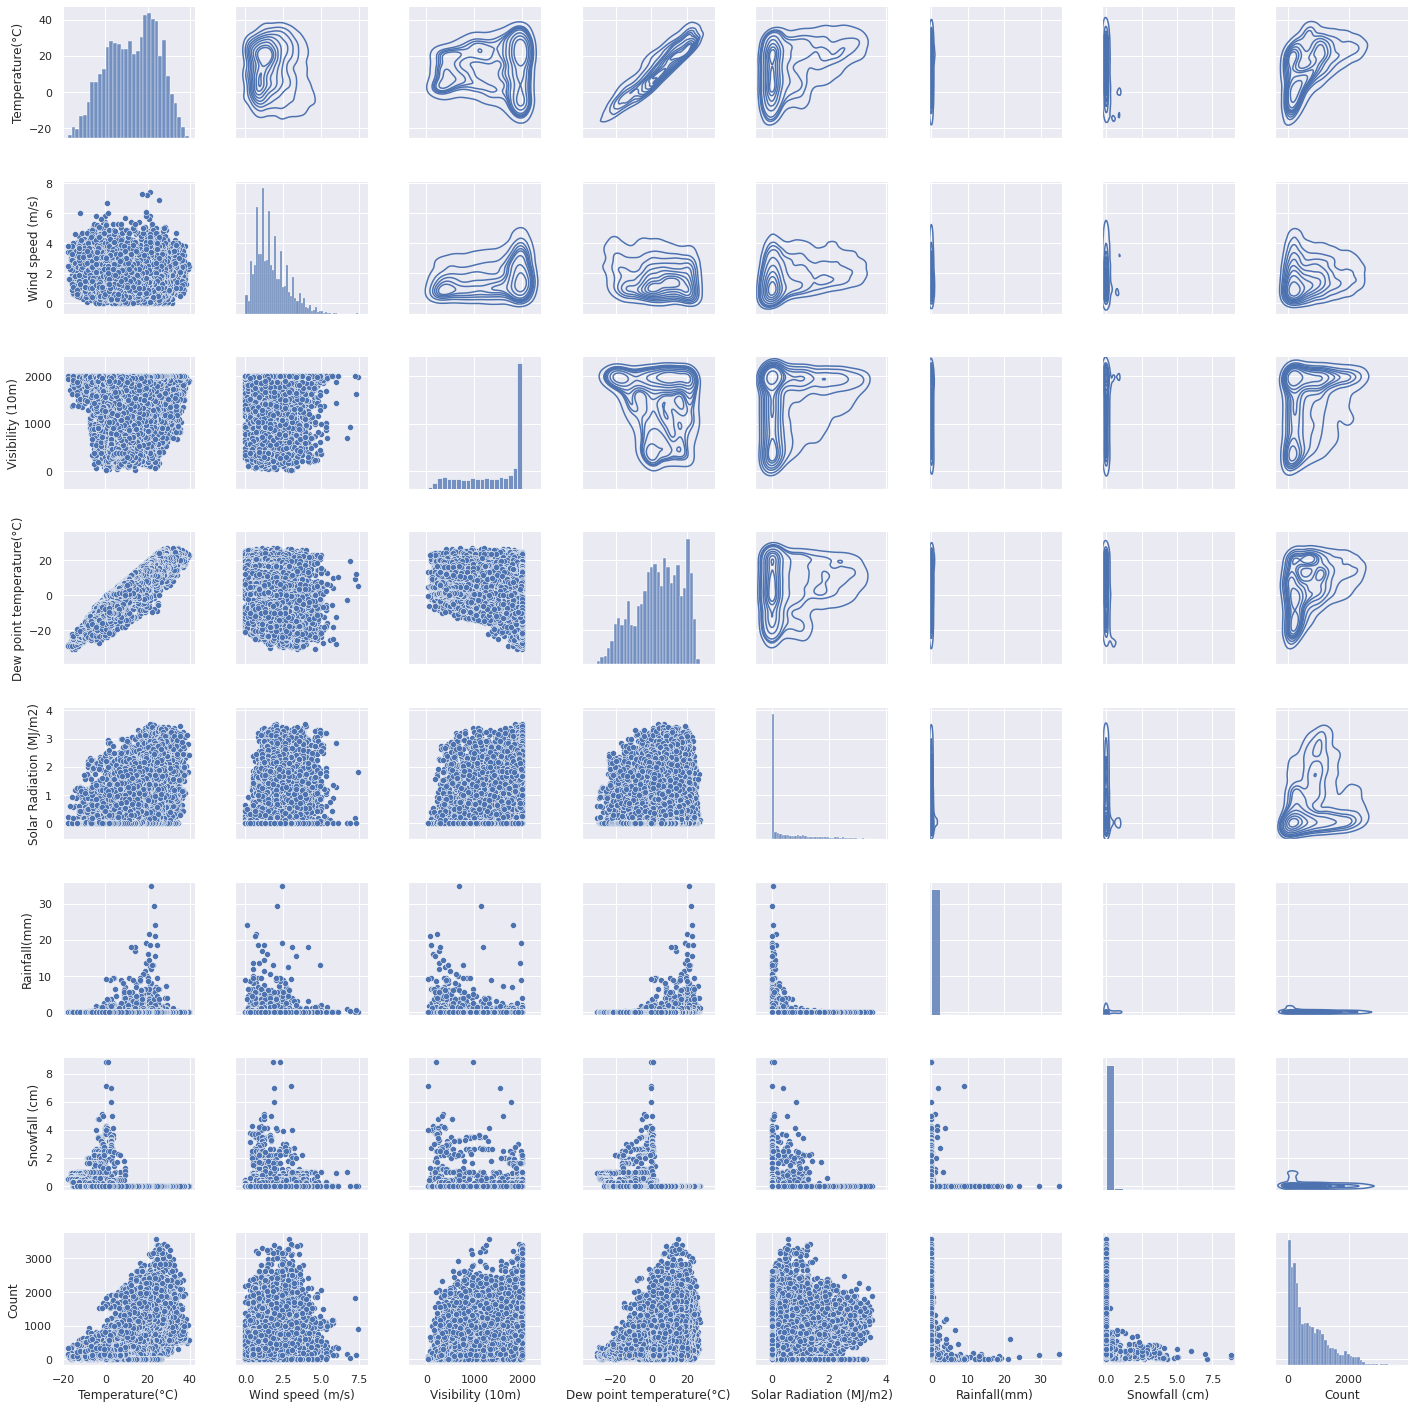

In [19]:
df_p = df[['Temperature(°C)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Count']]
g = sns.PairGrid(df_p, diag_sharey=False)
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)

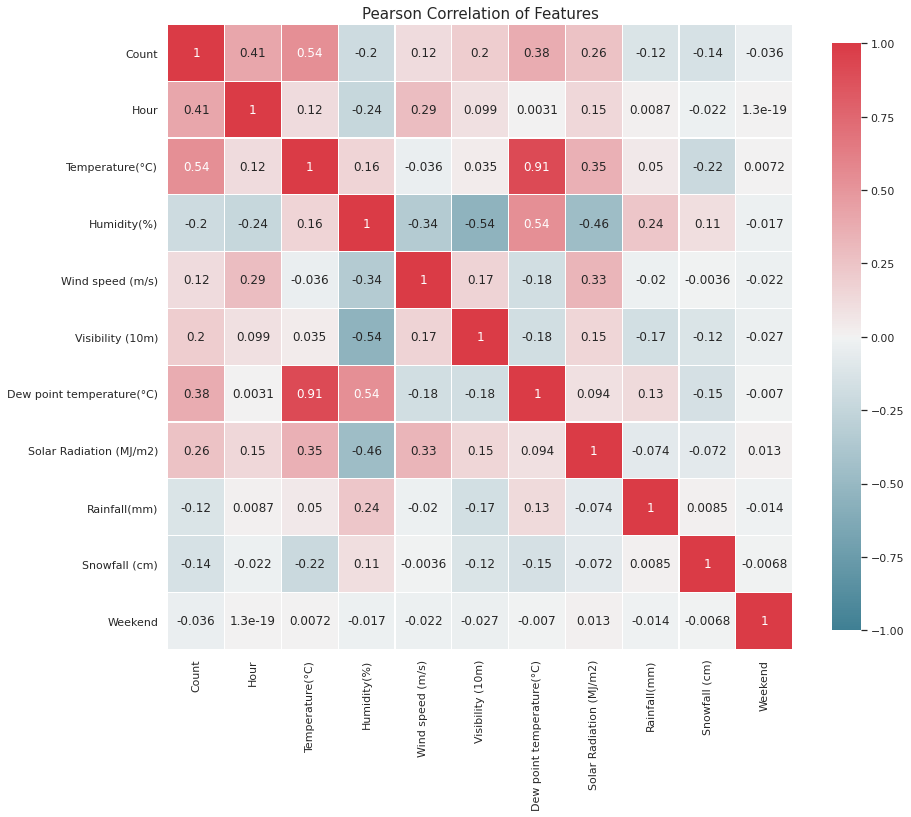

In [20]:
#%% Heatmap of data
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmin = -1.0, vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
correlation_heatmap(df)

In [21]:
from datetime import datetime
from datetime import timedelta
dft = df['Rented Bike Count'].copy()
#data set size is significant but we have only one year data so we will not
#capture seasonality and vacation correctly so we focus only on first 28 weeks
#starting from first monday in the dataset
dft = dft[datetime(2017,12,4):datetime(2017,12,4)+timedelta(7*4*7)]
dft

2017-12-04 00:00:00     285
2017-12-04 01:00:00     186
2017-12-04 02:00:00     112
2017-12-04 03:00:00      65
2017-12-04 04:00:00      41
                       ... 
2018-06-17 20:00:00    2429
2018-06-17 21:00:00    2055
2018-06-17 22:00:00    1819
2018-06-17 23:00:00    1323
2018-06-18 00:00:00     917
Name: Rented Bike Count, Length: 4705, dtype: int64

Let's plot this period.

/home/ing3lo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(736667.0, 736863.0)

(0.0, 37500.0)

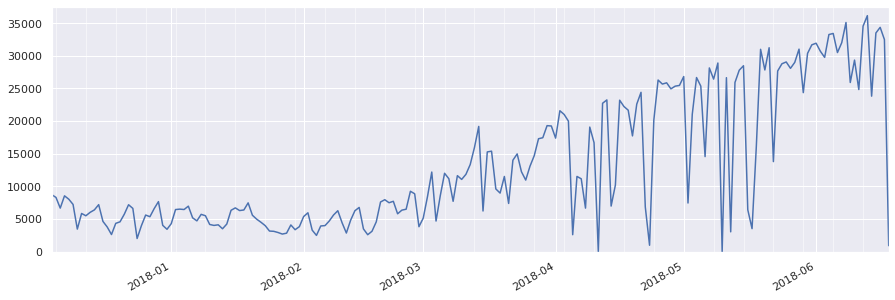

In [22]:
import matplotlib.dates as md
by_day = dft.resample('1D').sum()
fig, ax1 = plt.subplots(1,1, figsize=(15,5))
sns.lineplot(by_day.index, by_day.values, ax=ax1)
fig.autofmt_xdate()
ax1.xaxis.set_major_locator(md.MonthLocator(bymonthday = 1))
ax1.set_xlim(md.datestr2num(("2017/12/04", "2018/06/18")))
ax1.set_ylim((0, 37500))
ax1.xaxis.set_minor_locator(md.WeekdayLocator(byweekday = 1))
ax1.grid(b=True, which='minor', color='white', lw=0.5)

/home/ing3lo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(736667.0, 736695.0)

/home/ing3lo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(736695.0, 736723.0)

/home/ing3lo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(736723.0, 736751.0)

/home/ing3lo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(736751.0, 736779.0)

/home/ing3lo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(736779.0, 736807.0)

/home/ing3lo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(736807.0, 736835.0)

/home/ing3lo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(736835.0, 736863.0)

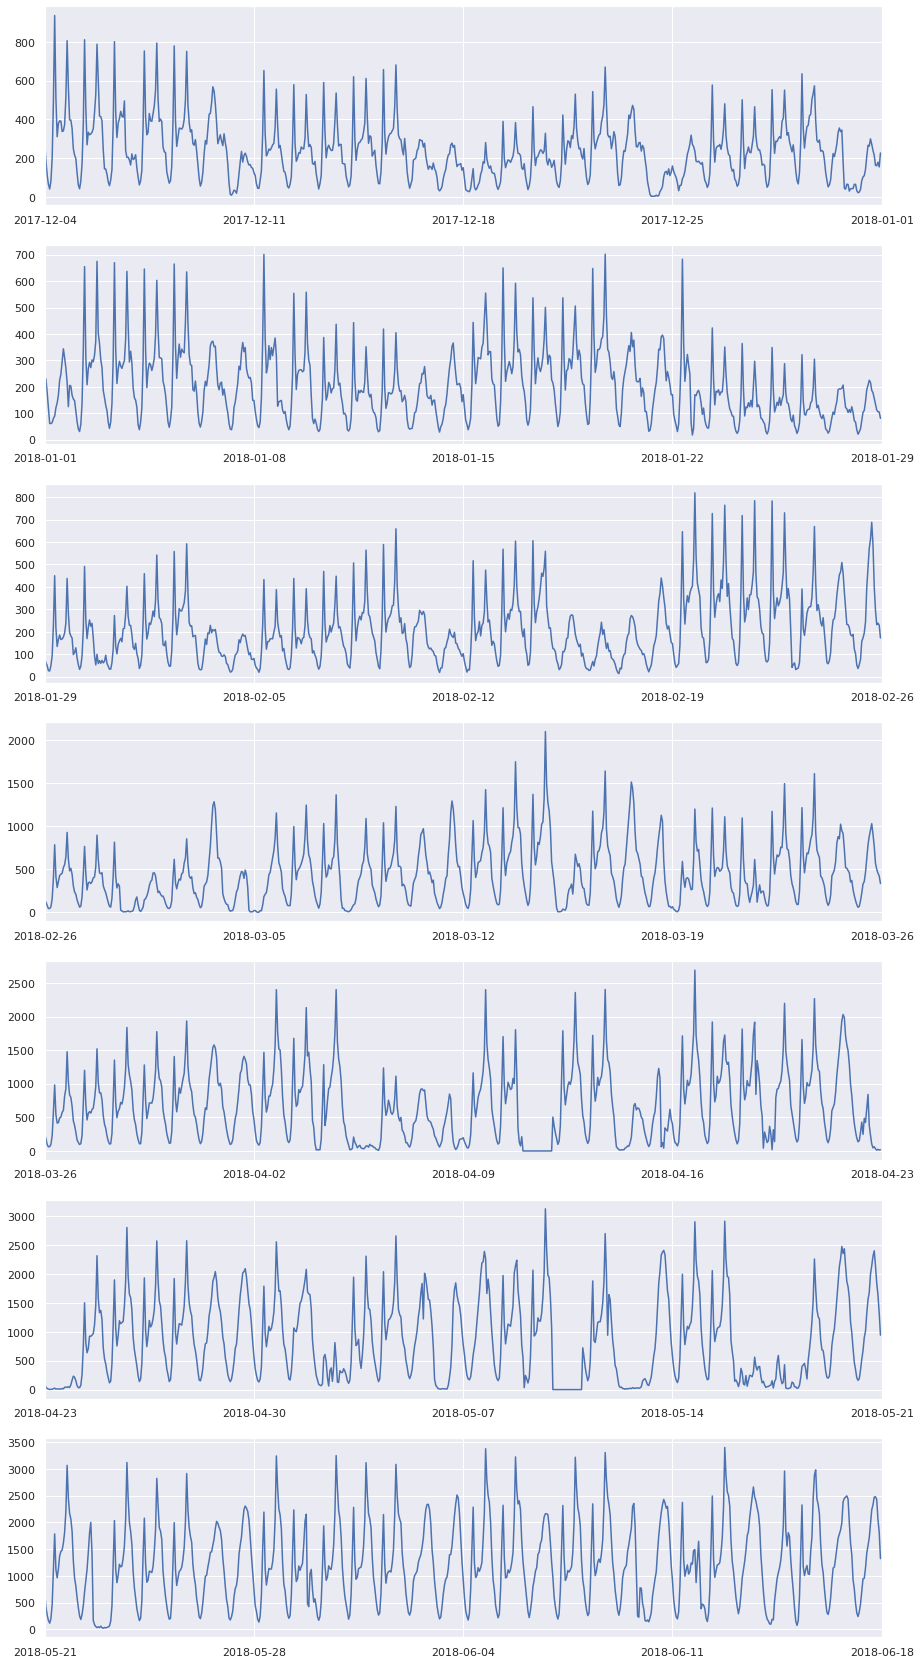

In [23]:
import matplotlib.dates as md
#in first examples we play with groupby
fig, axs = plt.subplots(7,1, figsize=(15,30))
for i in range(7):
    sns.lineplot(dft.index[24*7*4*i:24*7*4*(i+1)],
                 dft.values[24*7*4*i:24*7*4*(i+1)],
                 ax=axs[i])
    #fig.autofmt_xdate()
    axs[i].xaxis.set_major_locator(md.WeekdayLocator(byweekday = 0))

    dft = dft[:datetime(2017,12,4)+timedelta(7*4*7)]
    axs[i].set_xlim(md.date2num((datetime(2017,12,4)+timedelta(7*4*i), 
                                 datetime(2017,12,4)+timedelta(7*4*(i+1)))))
    axs[i].xaxis.set_minor_locator(md.WeekdayLocator(byweekday = 0))
    axs[i].grid(b=True, which='minor', color='white', lw=0.5)

In [24]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error

def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, 
                      plot_anomalies=False, day_average = False):
    if day_average:
        
        series = series.resample('1D').sum()
        rolling_mean = series.rolling(window=window).mean()

        fig, ax1 = plt.subplots(1,1, figsize=(15,5))
        plt.title("Moving average\n window size = {}".format(window))
        plt.plot(rolling_mean, "g", label="Rolling mean trend")

        # Plot confidence intervals for smoothed values
        if plot_intervals:
            mae = mean_absolute_error(series[window:], rolling_mean[window:])
            deviation = np.std(series[window:] - rolling_mean[window:])
            lower_bond = rolling_mean - (mae + scale * deviation)
            upper_bond = rolling_mean + (mae + scale * deviation)
            plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
            plt.plot(lower_bond, "r--")

            # Having the intervals, find abnormal values
            if plot_anomalies:
                anom_dwn = series[series<lower_bond]
                anom_up = series[series>upper_bond]
                anom = pd.concat([anom_dwn, anom_up], axis=1) 
                plt.plot(anom, "ro", markersize=5)

        plt.plot(series[window:], label="Actual values")
        plt.legend(loc="upper left")
        plt.grid(True)
        
    else:
        rolling_mean = series.rolling(window=window).mean()
        fig, axs = plt.subplots(7,1, figsize=(15,30))
        axs[0].set_title("Moving average\n window size = {}".format(window))
        if plot_intervals:
            mae = mean_absolute_error(series[window:], rolling_mean[window:])
            deviation = np.std(series[window:] - rolling_mean[window:])
            lower_bond = rolling_mean - (mae + scale * deviation)
            upper_bond = rolling_mean + (mae + scale * deviation)
        for i in range(7):
            axs[i].plot(rolling_mean[24*7*4*i:24*7*4*(i+1)], "g", label="Rolling mean trend")
            axs[i].plot(series[24*7*4*i:24*7*4*(i+1)], label="Actual values")
            #fig.autofmt_xdate()
            axs[i].xaxis.set_major_locator(md.WeekdayLocator(byweekday = 0))

            axs[i].set_xlim(md.date2num((datetime(2017,12,4)+timedelta(7*4*i), 
                                         datetime(2017,12,4)+timedelta(7*4*(i+1)))))
            axs[i].xaxis.set_minor_locator(md.WeekdayLocator(byweekday = 0))
            axs[i].grid(b=True, which='minor', color='white', lw=0.5)
            # Plot confidence intervals for smoothed values
            if plot_intervals:
                axs[i].plot(upper_bond[24*7*4*i:24*7*4*(i+1)], "r--", label="Upper Bond / Lower Bond")
                axs[i].plot(lower_bond[24*7*4*i:24*7*4*(i+1)], "r--")
                # Having the intervals, find abnormal values
                if plot_anomalies:
                    anom_dwn = series[24*7*4*i:24*7*4*(i+1)][series[24*7*4*i:24*7*4*(i+1)]<lower_bond[24*7*4*i:24*7*4*(i+1)]]
                    anom_up = series[24*7*4*i:24*7*4*(i+1)][series[24*7*4*i:24*7*4*(i+1)]>upper_bond[24*7*4*i:24*7*4*(i+1)]]
                    anom = pd.concat([anom_dwn, anom_up], axis=1) 
                    axs[i].plot(anom, "ro", markersize=5)
        axs[0].legend(loc="upper right")
        plt.grid(True)

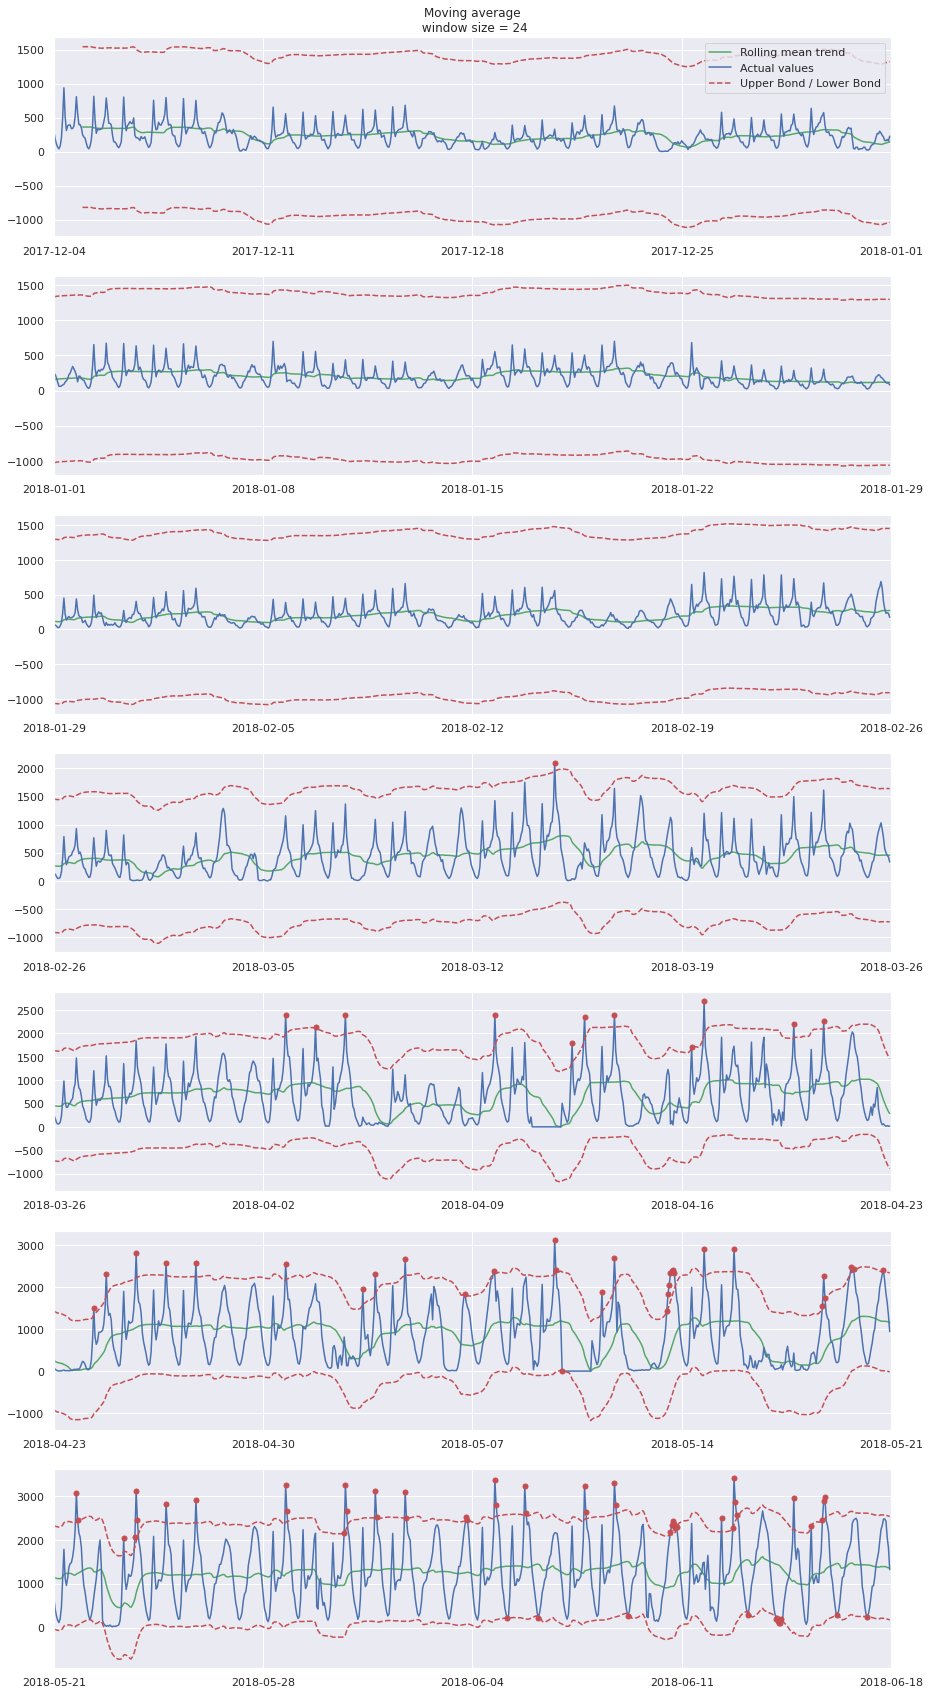

In [25]:
#Day trend (detailed)
plotMovingAverage(dft, 24, day_average=False, plot_intervals=True, plot_anomalies=True) 

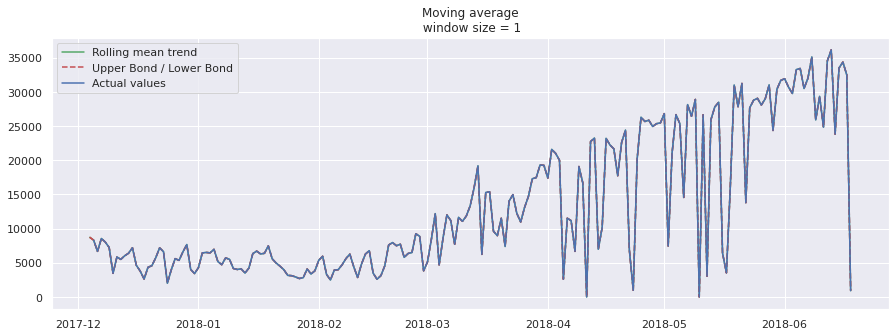

In [26]:
#Day trend (coarse)
plotMovingAverage(dft, 1, day_average=True, plot_intervals=True, plot_anomalies=True) 

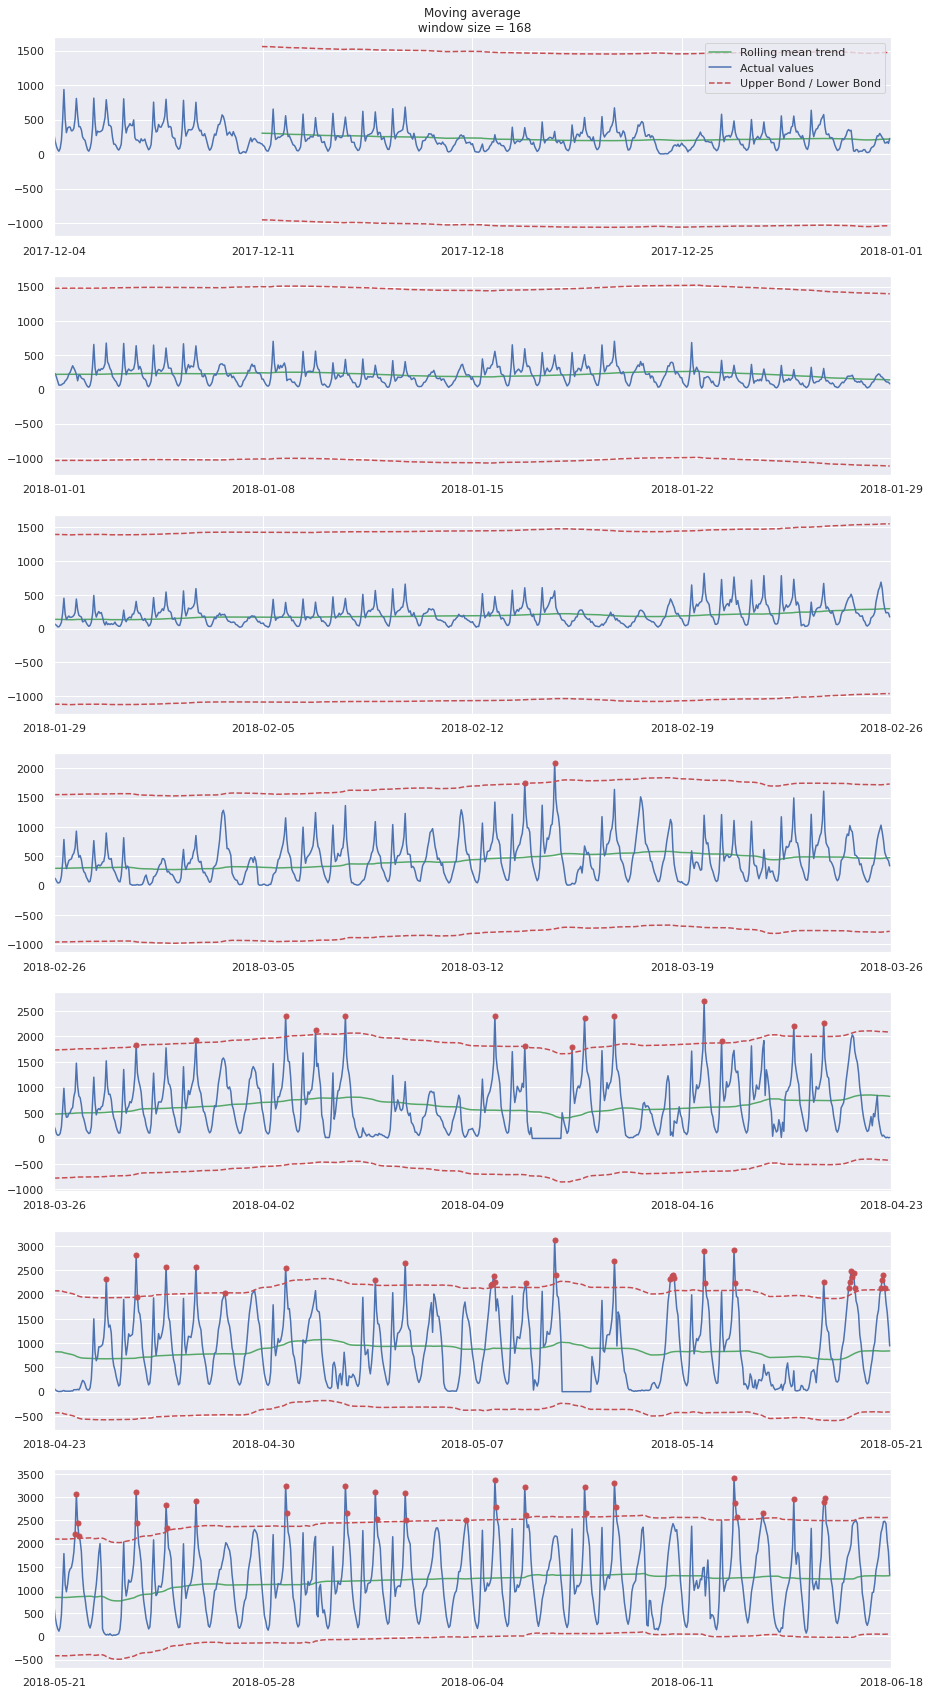

In [27]:
#Week trend (detailed)
plotMovingAverage(dft, 24*7, day_average=False, plot_intervals=True, plot_anomalies=True) 

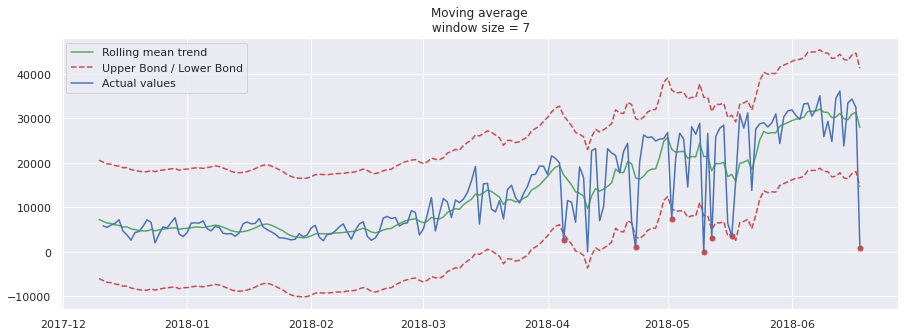

In [28]:
#Week trend (coarse)
plotMovingAverage(dft, 7, day_average=True, plot_intervals=True, plot_anomalies=True) 

The plot is definetly not stationary, the mean and variance increase in time.  
Let's try Holt-Winter method for regression.

In [29]:
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        #avg of diff between two seasons
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        #avg per season entry(from different seasons)
        #each entry minus avg per given season
        seasonals = {}
        #avg per season (sum from all entries in one season)
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

Holt-Winters method requires optimization method to find values of parameters: level, trend and cycle. FOr that we build a cross-validation function.

In [30]:
from sklearn.model_selection import TimeSeriesSplit

def timeseriesCVscore(params, series, loss_function=mean_absolute_error, slen=24):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=5) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

We seaech for the optimial parameters with scipyt.minimize function.

In [31]:
%%time
from scipy.optimize import minimize              # for function minimization
data = dft[:-24*7*4] # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_absolute_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 50 hours
model = HoltWinters(data, slen = 24*7, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 24*7*4, scaling_factor = 3)
model.triple_exponential_smoothing()

0.003309590516900829 0.00577054193861154 0.0
CPU times: user 2min 20s, sys: 59.2 ms, total: 2min 20s
Wall time: 2min 20s


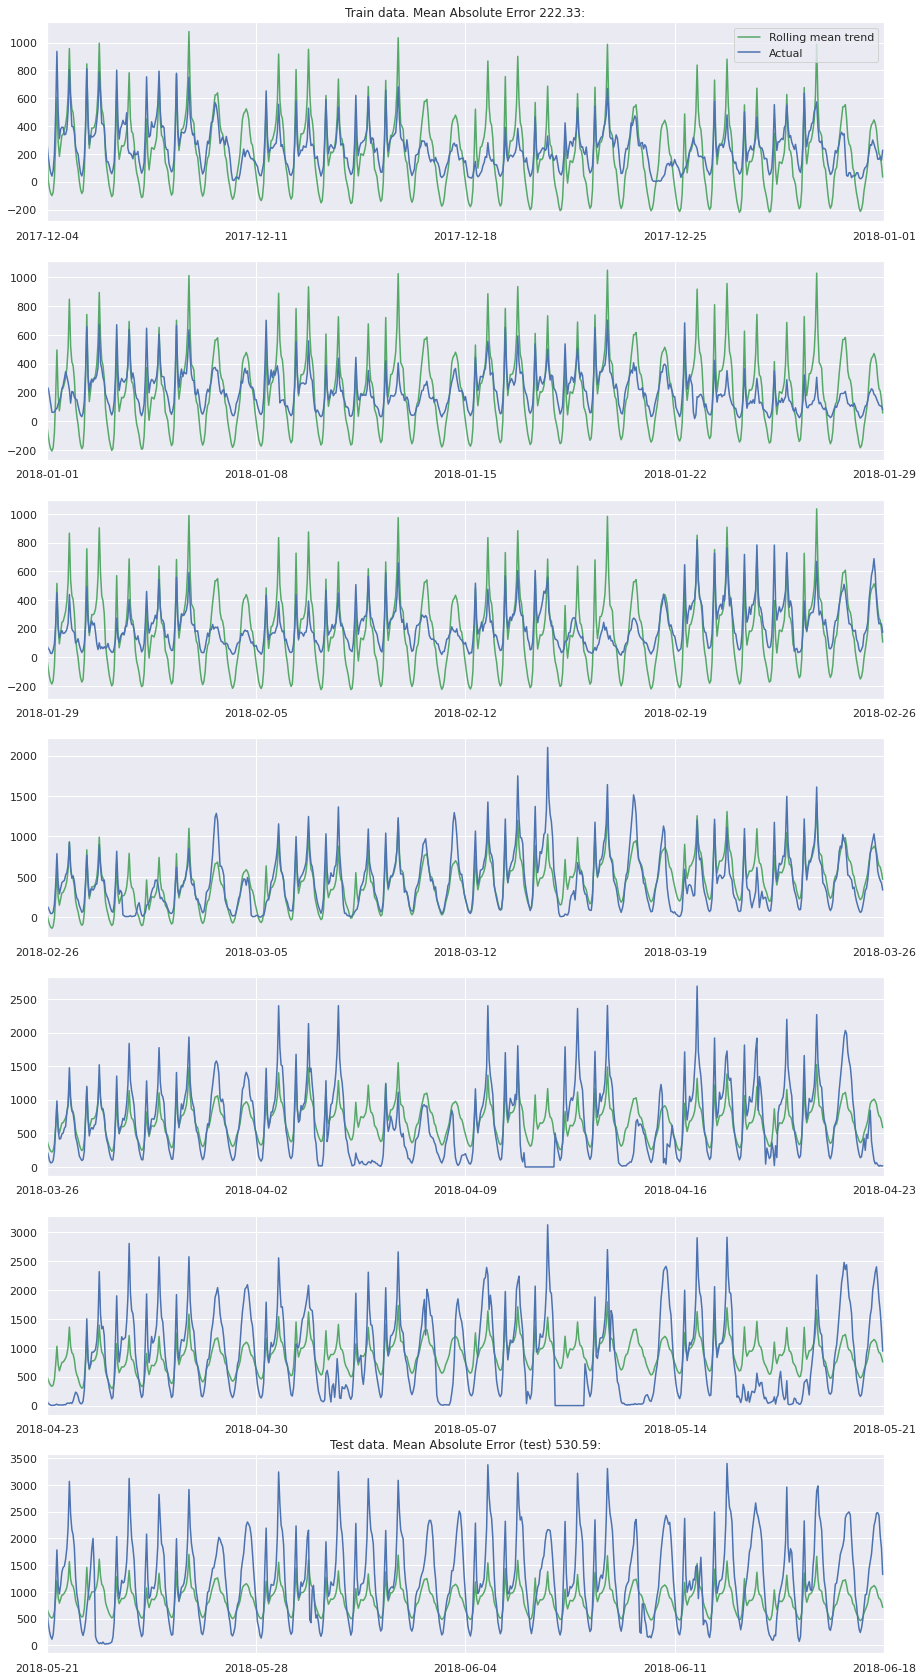

In [32]:
def plotHoltWinters(series, model, test_len, plot_intervals=False, plot_anomalies=False):
    """
        series - dataset with timeseries
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    res_mod = pd.Series(model.result[:len(series)], index=series.index)
    fig, axs = plt.subplots(7,1, figsize=(15,30))
    error_train = mean_absolute_error(series.values[:-test_len], res_mod[:-test_len])
    error_test = mean_absolute_error(series.values[-test_len:], res_mod[-test_len:])
    axs[0].set_title("Train data. Mean Absolute Error {:.2f}:".format(error_train))
    axs[-1].set_title("Test data. Mean Absolute Error (test) {:.2f}:".format(error_test))
    for i in range(7):
        axs[i].plot(res_mod[24*7*4*i:24*7*4*(i+1)], "g", label="Rolling mean trend")
        axs[i].plot(series[24*7*4*i:24*7*4*(i+1)], label="Actual")
        #fig.autofmt_xdate()
        axs[i].xaxis.set_major_locator(md.WeekdayLocator(byweekday = 0))

        axs[i].set_xlim(md.date2num((datetime(2017,12,4)+timedelta(7*4*i), 
                                     datetime(2017,12,4)+timedelta(7*4*(i+1)))))
        axs[i].xaxis.set_minor_locator(md.WeekdayLocator(byweekday = 0))
        axs[i].grid(b=True, which='minor', color='white', lw=0.5)
        # Plot confidence intervals for smoothed values
    axs[0].legend(loc="upper right")
    plt.grid(True)

plotHoltWinters(dft, model, 24*7*4)

Holt-Winters has problem with capturing the trend (changes in the variance and mean of the model), because it does not take the exogeneous variables under an account.  
Instead we try regression models with time lags.

In [33]:
#Laziness
df.rename(columns={'Rented Bike Count': 'y'}, inplace=True)

In [34]:
#backup just in case
dfc = df.copy()

In [35]:
df = pd.DataFrame(dfc.copy())
df = df[datetime(2017,12,4):datetime(2017,12,4)+timedelta(7*4*7)]
# Adding the lag of the target variable from 6 steps back up to 24
for i in range(6, 7*24):
    df["lag_{}".format(i)] = df['y'].shift(i)

In [36]:
df['Holiday'] = pd.Categorical(df['Holiday'], categories=['No Holiday', 'Holiday'])
df['Functioning Day'] = pd.Categorical(df['Functioning Day'], categories=['No', 'Yes'])
df['Weekday'] = pd.Categorical(pd.Series(df.index).dt.day_name(), categories=['Monday', 'Tuesday', 
             'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df['Weekend'] = (df['Weekday'].cat.codes >= 5).astype(int)
df['Hour'] = pd.Series(pd.Series(df.index).dt.hour.values, index= df.index)

In [37]:
#time for feature engineering
df['Functioning Day'] = df['Functioning Day'].cat.codes
df['Holiday'] = df['Holiday'].cat.codes
#hour, weekday and month are cyclical feature and it is beneficial to
#include it into encoding by use of sin and cos function:
df['Hour_sin'] = np.sin(df['Hour']*(2.*np.pi/24))
df['Hour_cos'] = np.cos(df['Hour']*(2.*np.pi/24))
df['Weekday_sin'] = np.sin(df['Weekday'].cat.codes*(2.*np.pi/7))
df['Weekday_cos'] = np.cos(df['Weekday'].cat.codes*(2.*np.pi/7))
df.drop(['Hour', 'Seasons', 'Weekday'], axis=1, inplace=True)

In [38]:
df.head()

y  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
2017-12-04 00:00:00  285              4.2           88               0.6   
2017-12-04 01:00:00  186              4.3           87               0.5   
2017-12-04 02:00:00  112              4.4           87               1.8   
2017-12-04 03:00:00   65              3.6           85               2.3   
2017-12-04 04:00:00   41              2.8           89               1.5   

                     Visibility (10m)  Dew point temperature(°C)  \
2017-12-04 00:00:00               216                        2.3   
2017-12-04 01:00:00               221                        2.3   
2017-12-04 02:00:00               207                        2.4   
2017-12-04 03:00:00               206                        1.3   
2017-12-04 04:00:00               130                        1.1   

                     Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
2017-12-04 00:00:00                      0.0           0.0            0.0   
2017-12-04 01:00:00                      0.0           0.0            0.0   
2017-12-04 02:00:00                      0.0           0.0            0.0   
2017-12-04 03:00:00                      0.0           0.0            0.0   
2017-12-04 04:00:00                      0.0           0.0            0.0   

                     Holiday  Functioning Day  lag_6  lag_7  lag_8  lag_9  \
2017-12-04 00:00:00        0                1    NaN    NaN    NaN    NaN   
2017-12-04 01:00:00        0                1    NaN    NaN    NaN    NaN   
2017-12-04 02:00:00        0                1    NaN    NaN    NaN    NaN   
2017-12-04 03:00:00        0                1    NaN    NaN    NaN    NaN   
2017-12-04 04:00:00        0                1    NaN    NaN    NaN    NaN   

                     lag_10  lag_11  lag_12  lag_13  lag_14  lag_15  lag_16  \
2017-12-04 00:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-12-04 01:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-12-04 02:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-12-04 03:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-12-04 04:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

                     lag_17  lag_18  ...  lag_149  lag_150  lag_151  lag_152  \
2017-12-04 00:00:00     NaN     NaN  ...      NaN      NaN      NaN      NaN   
2017-12-04 01:00:00     NaN     NaN  ...      NaN      NaN      NaN      NaN   
2017-12-04 02:00:00     NaN     NaN  ...      NaN      NaN      NaN      NaN   
2017-12-04 03:00:00     NaN     NaN  ...      NaN      NaN      NaN      NaN   
2017-12-04 04:00:00     NaN     NaN  ...      NaN      NaN      NaN      NaN   

                     lag_153  lag_154  lag_155  lag_156  lag_157  lag_158  \
2017-12-04 00:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2017-12-04 01:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2017-12-04 02:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2017-12-04 03:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2017-12-04 04:00:00      NaN      NaN      NaN      NaN      NaN      NaN   

                     lag_159  lag_160  lag_161  lag_162  lag_163  lag_164  \
2017-12-04 00:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2017-12-04 01:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2017-12-04 02:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2017-12-04 03:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2017-12-04 04:00:00      NaN      NaN      NaN      NaN      NaN      NaN   

                     lag_165  lag_166  lag_167  Weekend  Hour_sin  Hour_cos  \
2017-12-04 00:00:00      NaN      NaN      NaN        0  0.000000  1.000000   
2017-12-04 01:00:00      NaN      NaN      NaN        0  0.258819  0.965926   
2017-12-04 02:00:00      NaN      NaN      NaN        0  0.500000  0.866025   
2017-12-04 03:00:00      NaN     

In [39]:
#remove first period that consists from Nans
df = df.iloc[24*7:]

There is a lot of lag columns that may be redundant but for now we use all of them.  
For modelling we use Linear Regression with possible regularizations.
### Least squares regression

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

def timeseries_train_test_split(X, y, test_from):
    """
        Perform train-test split with respect to time series structure
    """
    
    X_train = X[:test_from]
    y_train = y[:test_from]
    X_test = X[test_from:]
    y_test = y[test_from:]
    
    return X_train, X_test, y_train, y_test

y = df['y']
X = df.drop(['y'], axis=1)

# reserve last 4 weeks of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, datetime(2018,5,21))

In [41]:
#make list of lag features
lag_l = []
for i in range(6, 7*24):
    lag_l.append("lag_{}".format(i))

In [42]:
#create transformator
column_trans = ColumnTransformer(
    [('log1p(wind)', FunctionTransformer(np.log1p), ['Wind speed (m/s)']),
    ('StandardScaler', StandardScaler(), ['Temperature(°C)', 'Humidity(%)', 'Dew point temperature(°C)']),
    ('MinMax', MinMaxScaler(), ['Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
                               'Snowfall (cm)']+lag_l)],
    remainder='passthrough')

In [43]:
# First a simple linear model
lr = Pipeline(steps=[('transform', column_trans),('lin', LinearRegression())])
lr.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log1p(wind)',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Wind speed (m/s)']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['Temperature(°C)',
                                                   'Humidity(%)',
                                                   'Dew point '
                                                   'temperature(°C)']),
                                                 ('MinMax', MinMaxScaler(),
                                                  ['Visibility (10m)',
                                                   'Solar Radiation (MJ/m2)',
                                              

In [44]:
def plotModelResults(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                     plot_intervals=False, plot_anomalies=False):
    """
        series - dataset with timeseries
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    res_mod = model.predict(X_test)
    res_mod = pd.Series(res_mod, index= y_test.index)
    fig, axs = plt.subplots(1,1, figsize=(15,5))
    error = mean_absolute_error(y_test, res_mod)
    axs.set_title("Mean Absolute Error: {0:.2f}".format(error))

    axs.plot(res_mod, "g", label="Model trend")
    axs.plot(y_test, label="Actual")
    #fig.autofmt_xdate()
    axs.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 0))

    #axs.set_xlim(md.date2num((datetime(2017,12,4)+timedelta(7*4*i), 
    #                             datetime(2017,12,4)+timedelta(7*4*(i+1)))))
    axs.xaxis.set_minor_locator(md.WeekdayLocator(byweekday = 0))
    axs.grid(b=True, which='minor', color='white', lw=0.5)
    # Plot confidence intervals for smoothed values
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        scale = 1.96
        lower = res_mod - (mae + scale * deviation)
        upper = res_mod + (mae + scale * deviation)
        axs.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        axs.plot(upper, "r--", alpha=0.5)
            
    axs.legend(loc="upper right")
    plt.grid(True)

    
def plotCoefficients(model, size = 10):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef[:size].plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed')
    return coefs[:size]

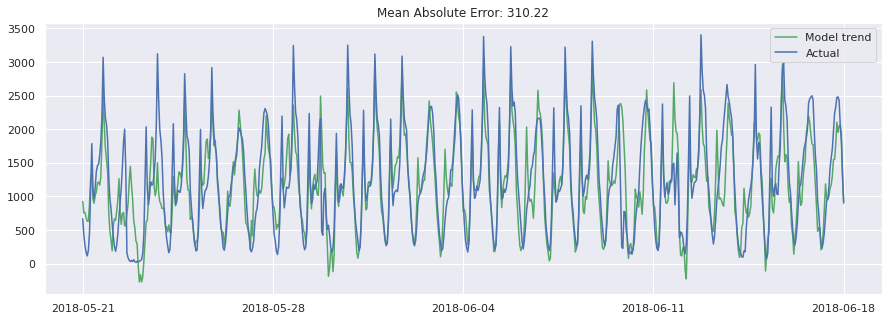

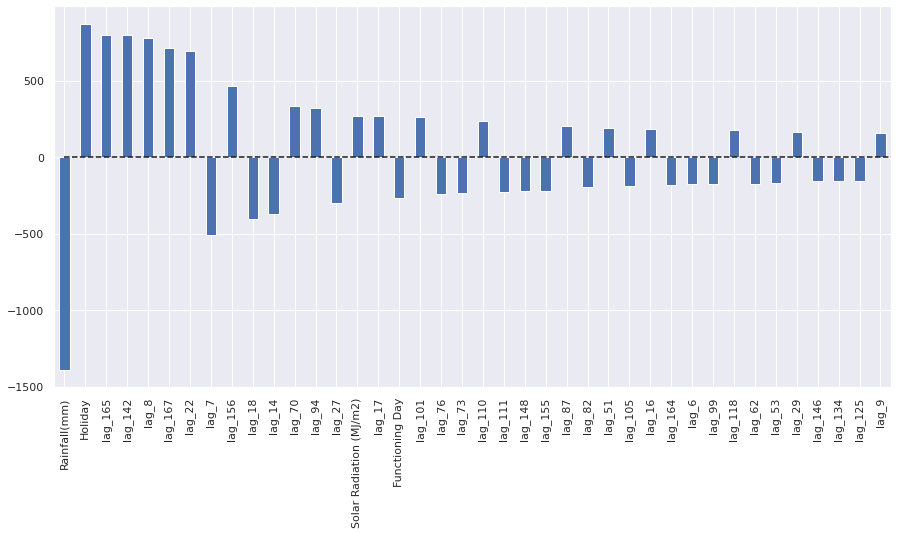

In [45]:
plotModelResults(lr)
coefs = plotCoefficients(lr['lin'], 40)

Even for simple linear model with no regularization the results are much better.
### Ridge regression

In [46]:
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you
# Time for Ridge regularization
pipe_lin1 = Pipeline(steps=[('transform', column_trans),('linR', Ridge(max_iter=100000))])
params = {'linR__alpha': [.001, .01, .1, 1., 10., 100.]}
tscv = TimeSeriesSplit(n_splits=5) 
gs = GridSearchCV(pipe_lin1, param_grid = params, return_train_score =True, cv=tscv, scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)
gs.best_params_
gs.best_score_

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log1p(wind)',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         ['Wind '
                                                                          'speed '
                                                                          '(m/s)']),
                                                                        ('StandardScaler',
                                                                         StandardScaler(),
                                                                         ['Temperature(°C)',
                                                                     

{'linR__alpha': 1.0}

-183.0700137957746

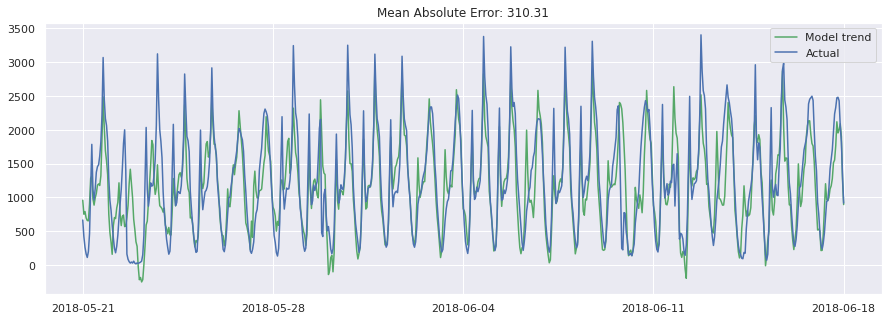

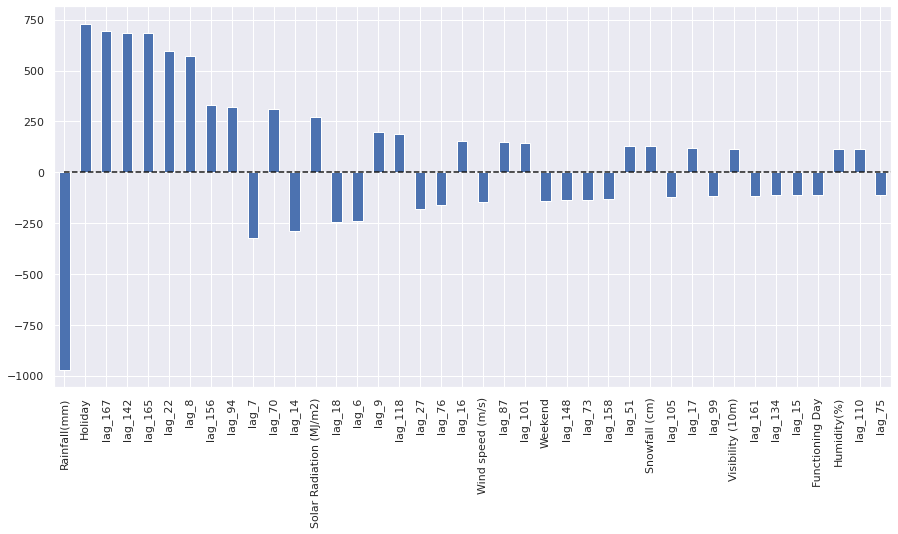

In [47]:
linR = gs.best_estimator_
plotModelResults(linR)
coefs = plotCoefficients(linR['linR'], 40)

Ridge regression did not help at all. There should be many redundant features, so Lasso could be a better choice.
### Lasso regression

In [48]:
pipe_lin1 = Pipeline(steps=[('transform', column_trans),('linL', Lasso(max_iter=100000))])
params = {'linL__alpha': [.001, .01, .1, 1., 10., 100.]}
tscv = TimeSeriesSplit(n_splits=5) 
gs = GridSearchCV(pipe_lin1, param_grid = params, return_train_score =True, cv=tscv, scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)
gs.best_params_
gs.best_score_

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log1p(wind)',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         ['Wind '
                                                                          'speed '
                                                                          '(m/s)']),
                                                                        ('StandardScaler',
                                                                         StandardScaler(),
                                                                         ['Temperature(°C)',
                                                                     

{'linL__alpha': 0.1}

-180.7641874885923

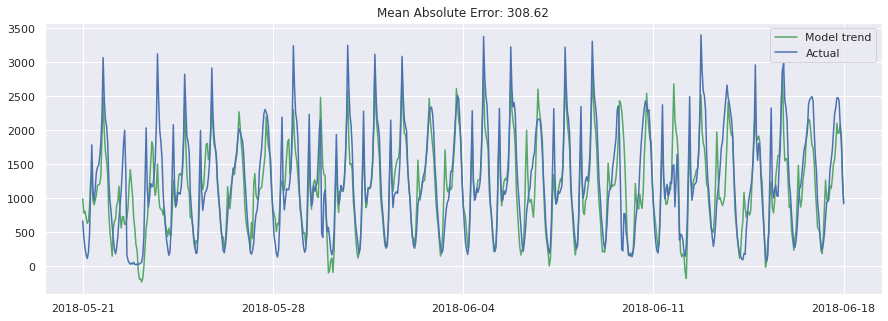

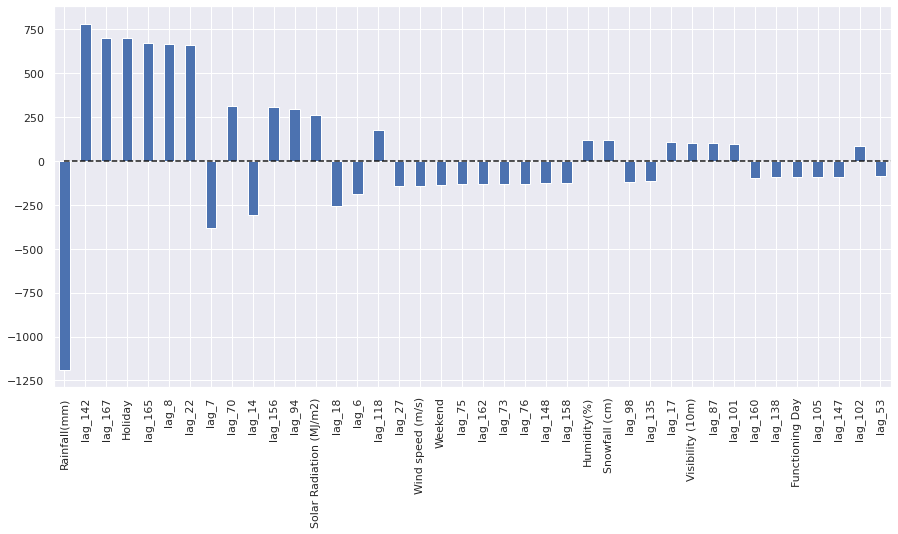

In [49]:
linL = gs.best_estimator_
plotModelResults(linL)
coefs = plotCoefficients(linL['linL'], 40)

Lasso improved the results, but only a little.  
Let's check important time series statistics.

In [50]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

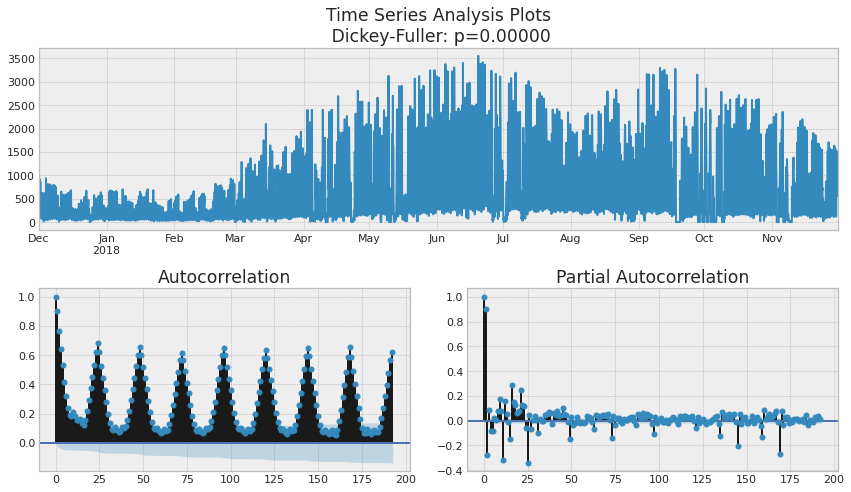

In [51]:
tsplot(dfc['y'], lags=24*8)

Time series is definetly non-stationary. Altought autocorrelation plot shows correlation every 24 hours in partial autocorrelation weekend days (values between 100 and 130) show no correlation. So true seasonality is 168 hours (1 week).
### Lags based on seasonality

In [52]:
#copy original data set for backup
df = pd.DataFrame(dfc.copy())
df = df[datetime(2017,12,4):datetime(2017,12,4)+timedelta(7*4*7)]
# Adding the lag of the target variable, now only seasonal
df["lag_1"] = df['y'].shift(1)
df["lag_24"] = df['y'].shift(24)
df["lag_168"] = df['y'].shift(24*7)
df['Holiday'] = pd.Categorical(df['Holiday'], categories=['No Holiday', 'Holiday'])
df['Functioning Day'] = pd.Categorical(df['Functioning Day'], categories=['No', 'Yes'])
df['Weekday'] = pd.Categorical(pd.Series(df.index).dt.day_name(), categories=['Monday', 'Tuesday', 
             'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df['Weekend'] = (df['Weekday'].cat.codes >= 5).astype(int)
df['Hour'] = pd.Series(pd.Series(df.index).dt.hour.values, index= df.index)
#time for feature engineering
#first instead of date use date counter to get possible increase of count in time
#end get codes from categorical
df['Functioning Day'] = df['Functioning Day'].cat.codes
df['Holiday'] = df['Holiday'].cat.codes
#hour, weekday and month are cyclical feature and it is beneficial to
#include it into encoding by use of sin and cos function:
df['Hour_sin'] = np.sin(df['Hour']*(2.*np.pi/24))
df['Hour_cos'] = np.cos(df['Hour']*(2.*np.pi/24))
df['Weekday_sin'] = np.sin(df['Weekday'].cat.codes*(2.*np.pi/7))
df['Weekday_cos'] = np.cos(df['Weekday'].cat.codes*(2.*np.pi/7))
df.drop(['Hour', 'Seasons', 'Weekday'], axis=1, inplace=True)
#remove first period that consists from Nans
df = df.iloc[24*7:]
df.head()

y  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
2017-12-11 00:00:00  125             -2.5           39               3.4   
2017-12-11 01:00:00  111             -3.4           36               3.8   
2017-12-11 02:00:00   67             -4.2           35               3.4   
2017-12-11 03:00:00   45             -4.7           38               2.4   
2017-12-11 04:00:00   44             -5.2           35               3.2   

                     Visibility (10m)  Dew point temperature(°C)  \
2017-12-11 00:00:00              2000                      -14.5   
2017-12-11 01:00:00              2000                      -16.3   
2017-12-11 02:00:00              2000                      -17.4   
2017-12-11 03:00:00              2000                      -16.8   
2017-12-11 04:00:00              2000                      -18.3   

                     Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
2017-12-11 00:00:00                      0.0           0.0            0.0   
2017-12-11 01:00:00                      0.0           0.0            0.0   
2017-12-11 02:00:00                      0.0           0.0            0.0   
2017-12-11 03:00:00                      0.0           0.0            0.0   
2017-12-11 04:00:00                      0.0           0.0            0.0   

                     Holiday  Functioning Day  lag_1  lag_24  lag_168  \
2017-12-11 00:00:00        0                1  148.0   326.0    285.0   
2017-12-11 01:00:00        0                1  125.0   280.0    186.0   
2017-12-11 02:00:00        0                1  111.0   243.0    112.0   
2017-12-11 03:00:00        0                1   67.0   169.0     65.0   
2017-12-11 04:00:00        0                1   45.0    71.0     41.0   

                     Weekend  Hour_sin  Hour_cos  Weekday_sin  Weekday_cos  
2017-12-11 00:00:00        0  0.000000  1.000000          0.0          1.0  
2017-12-11 01:00:00        0  0.258819  0.965926          0.0          1.0  
2017-12-11 02:00:00        0  0.500000  0.866025          0.0          1.0  
2017-12-11 03:00:00        0  0.707107  0.707107          0.0          1.0  
2017-12-11 04:00:00        0  0.866025  0.500000          0.0          1.0

In [53]:
y = df['y']
X = df.drop(['y'], axis=1)
# last 4 weeks for model testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, datetime(2018,5,21))

### Predicitons done one hour in advance.

In [54]:
column_trans = ColumnTransformer(
    [('log1p(wind)', FunctionTransformer(np.log1p), ['Wind speed (m/s)']),
    ('StandardScaler', StandardScaler(), ['Temperature(°C)', 'Humidity(%)', 'Dew point temperature(°C)']),
    ('MinMax', MinMaxScaler(), ['Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
                               'Snowfall (cm)', 'lag_1', 'lag_24', 'lag_168'])],
    remainder='passthrough')

# Now we go straight to Lasso
pipe_lin1 = Pipeline(steps=[('transform', column_trans),('linL', Lasso(max_iter=100000))])
params = {'linL__alpha': [.001, .01, .1, 1., 10., 100.]}
tscv = TimeSeriesSplit(n_splits=5) 
gs = GridSearchCV(pipe_lin1, param_grid = params, return_train_score =True, cv=tscv, scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)
gs.best_params_
gs.best_score_

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log1p(wind)',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         ['Wind '
                                                                          'speed '
                                                                          '(m/s)']),
                                                                        ('StandardScaler',
                                                                         StandardScaler(),
                                                                         ['Temperature(°C)',
                                                                     

{'linL__alpha': 1.0}

-123.94566392728788

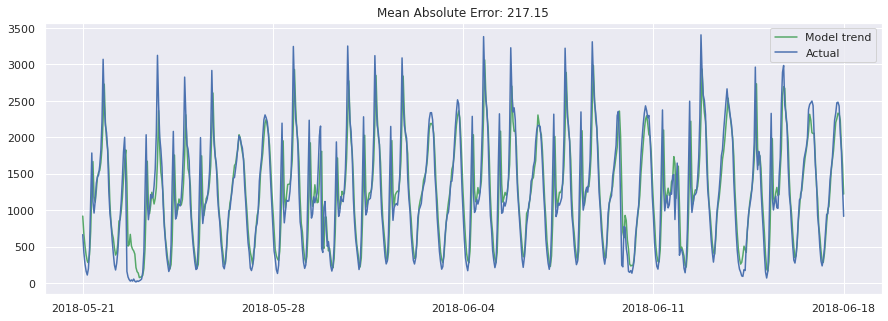

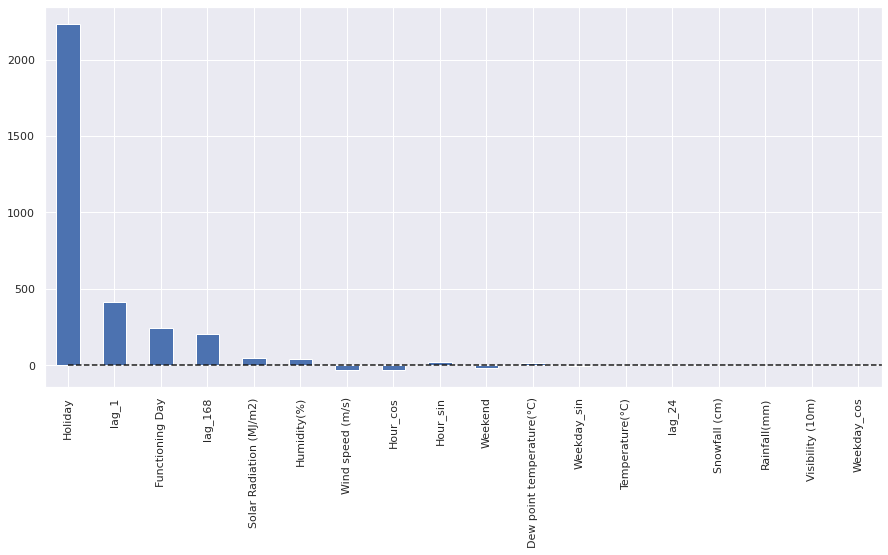

In [55]:
linL = gs.best_estimator_
plotModelResults(linL, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
coefs = plotCoefficients(linL['linL'], 18)

Predictions done one hour in advance are really accurate.

### Predicitons done one day in advance.

In [56]:
X_train.drop(['lag_1'], axis=1, inplace=True)
X_test.drop(['lag_1'], axis=1, inplace=True)

/home/ing3lo/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
column_trans = ColumnTransformer(
    [('log1p(wind)', FunctionTransformer(np.log1p), ['Wind speed (m/s)']),
    ('StandardScaler', StandardScaler(), ['Temperature(°C)', 'Humidity(%)', 'Dew point temperature(°C)']),
    ('MinMax', MinMaxScaler(), ['Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
                               'Snowfall (cm)', 'lag_24', 'lag_168'])],
    remainder='passthrough')

# Now we go straight to Lasso
pipe_lin1 = Pipeline(steps=[('transform', column_trans),('linL', Lasso(max_iter=100000))])
params = {'linL__alpha': [.001, .01, .1, 1., 10., 100.]}
tscv = TimeSeriesSplit(n_splits=5) 
gs = GridSearchCV(pipe_lin1, param_grid = params, return_train_score =True, cv=tscv, scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)
gs.best_params_
gs.best_score_

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log1p(wind)',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         ['Wind '
                                                                          'speed '
                                                                          '(m/s)']),
                                                                        ('StandardScaler',
                                                                         StandardScaler(),
                                                                         ['Temperature(°C)',
                                                                     

{'linL__alpha': 0.001}

-185.24194573206586

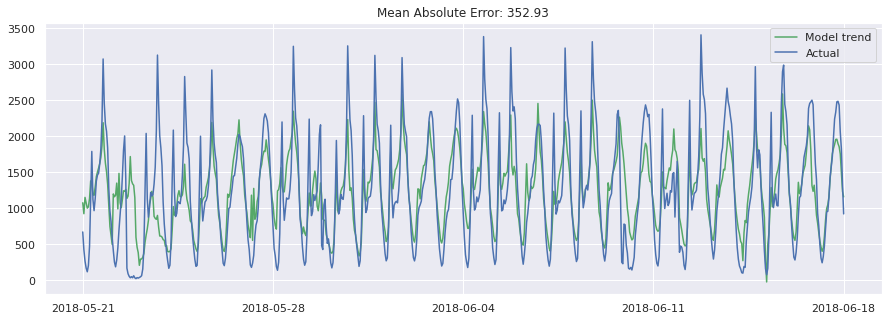

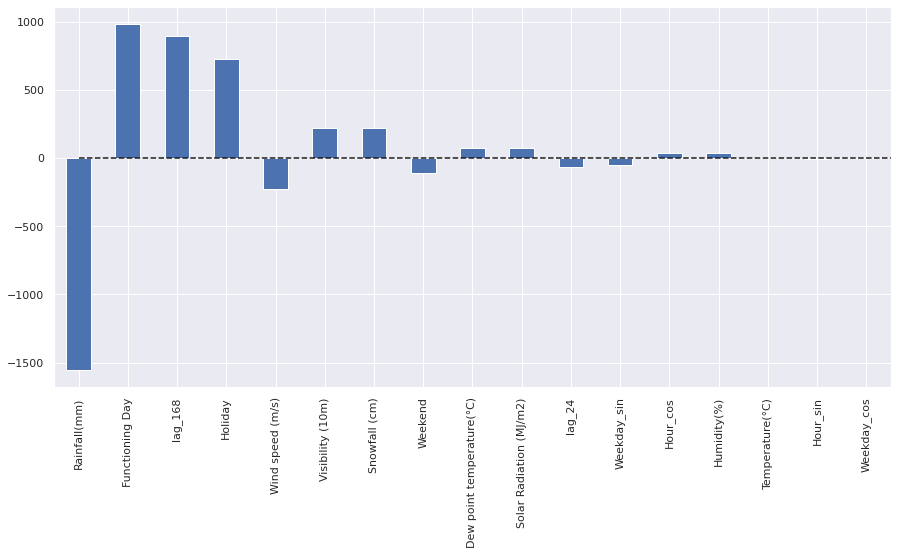

In [58]:
linL = gs.best_estimator_
plotModelResults(linL, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
coefs = plotCoefficients(linL['linL'], 18)

Accuracy drop is significant, but still results are reasonable. Value of lag_24 coeffiecient is small when compared to lag_168 so prediction one week in advance should still be reasonable.

### Predicitons done one week in advance.

In [59]:
X_train.drop(['lag_24'], axis=1, inplace=True)
X_test.drop(['lag_24'], axis=1, inplace=True)

/home/ing3lo/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
column_trans = ColumnTransformer(
    [('log1p(wind)', FunctionTransformer(np.log1p), ['Wind speed (m/s)']),
    ('StandardScaler', StandardScaler(), ['Temperature(°C)', 'Humidity(%)', 'Dew point temperature(°C)']),
    ('MinMax', MinMaxScaler(), ['Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
                               'Snowfall (cm)', 'lag_168'])],
    remainder='passthrough')

# Now we go straight to Lasso
pipe_lin1 = Pipeline(steps=[('transform', column_trans),('linL', Lasso(max_iter=100000))])
params = {'linL__alpha': [.001, .01, .1, 1., 10., 100.]}
tscv = TimeSeriesSplit(n_splits=5) 
gs = GridSearchCV(pipe_lin1, param_grid = params, return_train_score =True, cv=tscv, scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)
gs.best_params_
gs.best_score_

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log1p(wind)',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         ['Wind '
                                                                          'speed '
                                                                          '(m/s)']),
                                                                        ('StandardScaler',
                                                                         StandardScaler(),
                                                                         ['Temperature(°C)',
                                                                     

{'linL__alpha': 0.001}

-199.07602334166947

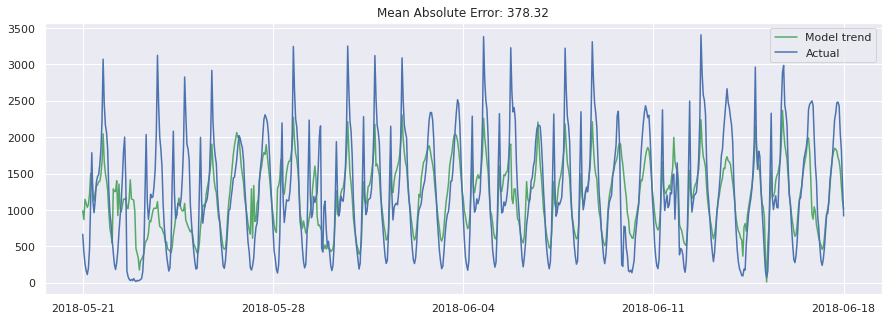

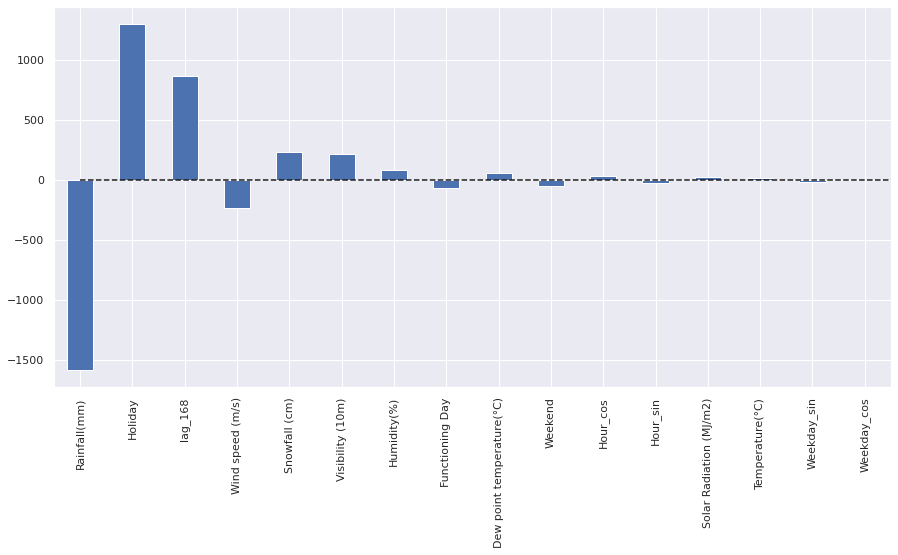

In [61]:
linL = gs.best_estimator_
plotModelResults(linL, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
coefs = plotCoefficients(linL['linL'], 18)

Regression is much better than exponential model but it assumes that rainfall and other weather parameters are known beforehand. This is usually not true and weather can also only be predicted with some degree of accuracy.